In [1]:
import re
import nltk
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, GlobalMaxPooling1D, Dropout
from transformers import BertTokenizer, TFBertForSequenceClassification

tqdm.pandas()
nltk.download('punkt_tab')

warnings.filterwarnings('ignore')

C:\Users\Billaaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Billaaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
FILE_PATH = '../Data/prep&clean_dataset.csv'
#COL_NAMES = ["sentiment", "id", "date", "flag", "user", "text"]
df = pd.read_csv(FILE_PATH, encoding = "ISO-8859-1")
print(df.isnull().sum())
df = df.dropna(subset=['lemmatized text'])


Unnamed: 0            0
sentiment             0
text                  0
tokenized text        0
clean_tokens          0
lemmatized text    8369
no_of_charcters       0
no_of_words           0
dtype: int64


In [3]:
df.head()

,Unnamed: 0,sentiment,text,tokenized text,clean_tokens,lemmatized text,no_of_charcters,no_of_words
0,0,Negative,awww that s a bummer you shoulda got ...,"['awww', 'that', 's', 'a', 'bummer', 'you', 's...","['awww', 'bummer', 'shoulda', 'got', 'david', ...",awww bummer shoulda get david carr third day,44,8
1,1,Negative,is upset that he can t update his facebook by ...,"['is', 'upset', 'that', 'he', 'can', 't', 'upd...","['upset', 'update', 'facebook', 'texting', 'mi...",upset update facebook texting might cry result...,69,11
2,2,Negative,i dived many times for the ball managed to ...,"['i', 'dived', 'many', 'times', 'for', 'the', ...","['dived', 'many', 'times', 'ball', 'managed', ...",dive many time ball manage save 50 rest go bound,48,10
3,3,Negative,my whole body feels itchy and like its on fire,"['my', 'whole', 'body', 'feels', 'itchy', 'and...","['whole', 'body', 'feels', 'itchy', 'like', 'f...",whole body feel itchy like fire,31,6
4,4,Negative,no it s not behaving at all i m mad why a...,"['no', 'it', 's', 'not', 'behaving', 'at', 'al...","['behaving', 'mad', 'see']",behave mad see,14,3


In [4]:
# splitting the dataset
X = df['lemmatized text']
y = df['sentiment'].map({"Negative":0, "Positive":1})


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1580202 entries, 0 to 1588570
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Unnamed: 0       1580202 non-null  int64 
 1   sentiment        1580202 non-null  object
 2   text             1580202 non-null  object
 3   tokenized text   1580202 non-null  object
 4   clean_tokens     1580202 non-null  object
 5   lemmatized text  1580202 non-null  object
 6   no_of_charcters  1580202 non-null  int64 
 7   no_of_words      1580202 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 108.5+ MB


In [6]:
print(X_train.shape ,X_test.shape)


(1264161,) (316041,)


In [7]:
# Applying Vectorization Techniques
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer.fit(tqdm(X_train, desc="Vectorizing Text"))

Vectorizing Text: 100%|██████████| 1264161/1264161 [00:29<00:00, 42886.53it/s]


TfidfVectorizer(ngram_range=(1, 2))

In [8]:
X_train = vectorizer.transform(tqdm(X_train))
X_test = vectorizer.transform(tqdm(X_test))

  0%|          | 0/1264161 [00:00<?, ?it/s]

100%|██████████| 316041/316041 [00:07<00:00, 41130.88it/s]


In [10]:
model_score ={}

In [11]:
### Model 1 

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_test_pred = nb.predict(X_test)

y_train_pred = nb.predict(X_train)

print("Naive Bayes Accuracy test:", accuracy_score( y_test,y_test_pred))
print("Naive Bayes Accuracy train:", accuracy_score( y_train,y_train_pred))
model_score["NB"]=accuracy_score( y_test,y_test_pred)


Naive Bayes Accuracy test: 0.7747918782689588
Naive Bayes Accuracy train: 0.8934486983857277


In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
print("Logistic Regression Accuracy test:", accuracy_score(y_test, y_test_pred))
print("Logistic Regression Accuracy train:", accuracy_score( y_train,y_train_pred))
model_score["LR"]=accuracy_score( y_test,y_test_pred)


Logistic Regression Accuracy test: 0.787173183226227
Logistic Regression Accuracy train: 0.8281555909413437


In [19]:
## Model 3 -- Random Forest

rf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
print("Random Forest Accuracy test:", accuracy_score( y_test,y_test_pred))
print("Random Forest Accuracy train:", accuracy_score( y_train,y_train_pred))
model_score["RF"]=accuracy_score( y_test,y_test_pred)


Random Forest Accuracy test: 0.7356
Random Forest Accuracy train: 0.75284375


In [20]:
## Model 4 -- XG Boost

#xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = 55, early_stopping_rounds = 10)
#xgb.fit(X_train, y_train)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                    max_depth=6, n_estimators=500, tree_method='hist')
xgb.fit(X_train, y_train, eval_set=[(X_train, y_train)], 
        verbose=True)

#y_pred_xgb = xgb.predict(X_test)
y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)
print("XGBoost Accuracy test:", accuracy_score( y_test,y_test_pred))
print("XGBoost Accuracy train:", accuracy_score( y_train,y_train_pred))
model_score["XGBoost"]=accuracy_score( y_test,y_test_pred)


[0]	validation_0-logloss:0.67480
[1]	validation_0-logloss:0.66329
[2]	validation_0-logloss:0.65444
[3]	validation_0-logloss:0.64742
[4]	validation_0-logloss:0.64123
[5]	validation_0-logloss:0.63585
[6]	validation_0-logloss:0.63095
[7]	validation_0-logloss:0.62613
[8]	validation_0-logloss:0.62218
[9]	validation_0-logloss:0.61864
[10]	validation_0-logloss:0.61487
[11]	validation_0-logloss:0.61127
[12]	validation_0-logloss:0.60838
[13]	validation_0-logloss:0.60563
[14]	validation_0-logloss:0.60305
[15]	validation_0-logloss:0.60072
[16]	validation_0-logloss:0.59796
[17]	validation_0-logloss:0.59553
[18]	validation_0-logloss:0.59351
[19]	validation_0-logloss:0.59134
[20]	validation_0-logloss:0.58865
[21]	validation_0-logloss:0.58677
[22]	validation_0-logloss:0.58487
[23]	validation_0-logloss:0.58292
[24]	validation_0-logloss:0.58102
[25]	validation_0-logloss:0.57942
[26]	validation_0-logloss:0.57781
[27]	validation_0-logloss:0.57617
[28]	validation_0-logloss:0.57466
[29]	validation_0-loglos

In [14]:
## Model 5 -- SVM

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=500)

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_test_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_test_pred))

y_test_pred = svm.predict(X_test)
y_train_pred = svm.predict(X_train)
print("SVM Accuracy: test:", accuracy_score( y_test,y_test_pred))
print("SVM Accuracy: train:", accuracy_score( y_train,y_train_pred))
model_score["SVM"]=accuracy_score( y_test,y_test_pred)



In [21]:

# splitting the dataset
X = df['lemmatized text']
y = df['sentiment'].map({"Negative":0, "Positive":1})


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [22]:
# Model 6: LSTM with TensorFlow/Keras
max_features = 5000
embedding_dim = 128
maxlen = 100

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=maxlen)

model_lstm = Sequential([
    Embedding(max_features, embedding_dim, input_length=maxlen),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train_pad, y_train, batch_size=32, epochs=5, validation_data=(X_test_pad, y_test))
y_pred_lstm = (model_lstm.predict(X_test_pad) > 0.5).astype("int32")
print("LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))
model_score["LSTM"]=accuracy_score( y_test,y_pred_lstm)


Epoch 1/5
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 518s 109ms/step - accuracy: 0.7295 - loss: 0.5302 - val_accuracy: 0.7708 - val_loss: 0.4782
Epoch 2/5
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 501s 107ms/step - accuracy: 0.7843 - loss: 0.4543 - val_accuracy: 0.7723 - val_loss: 0.4781
Epoch 3/5
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 510s 109ms/step - accuracy: 0.7980 - loss: 0.4300 - val_accuracy: 0.7732 - val_loss: 0.4789
Epoch 4/5
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 492s 105ms/step - accuracy: 0.8088 - loss: 0.4098 - val_accuracy: 0.7678 - val_loss: 0.4912
Epoch 5/5
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 495s 105ms/step - accuracy: 0.8205 - loss: 0.3881 - val_accuracy: 0.7666 - val_loss: 0.5022
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 33ms/step
LSTM Accuracy: 0.7666


In [23]:
# Model 7: CNN with TensorFlow/Keras
model_cnn = Sequential([
    Embedding(max_features, embedding_dim, input_length=maxlen),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.fit(X_train_pad, y_train, batch_size=32, epochs=5, validation_data=(X_test_pad, y_test))
y_pred_cnn = (model_cnn.predict(X_test_pad) > 0.5).astype("int32")
print("CNN Accuracy:", accuracy_score(y_test, y_pred_cnn))
model_score["CNN"]=accuracy_score( y_test,y_pred_cnn)


Epoch 1/5
2930/4688 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.7075 - loss: 0.5501

In [ ]:
# ## Saving all the models 

# # joblib.dump(rf, '../models/random_forest_model.pkl')
# # joblib.dump(xgb, '../models/XGBoost_model.pkl')

# # joblib.dump(svn, '../models/svn_model.pkl')

# model_cnn.save('../models/model_cnn.h5')
# model_lstm.save('../models/model_lstm.h5')





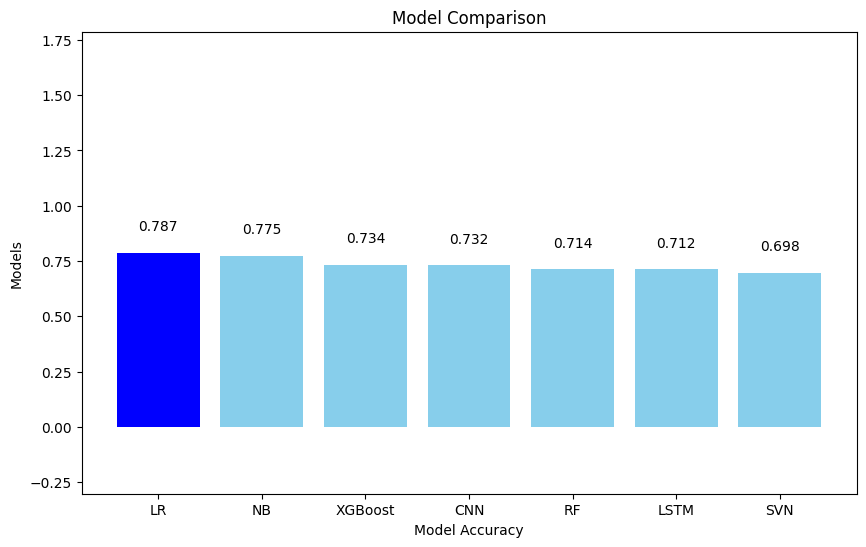

In [25]:

# Example dictionary with data
data = model_score

# Sort data
sorted_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))
categories = list(sorted_data.keys())
values = list(sorted_data.values())
values = [round(v,3) for v in values ]
# Create figure with custom size
plt.figure(figsize=(10, 6))

# Bar colors: Highlight the highest bar
colors = ['blue' if v == max(values) else 'skyblue' for v in values]

# Plot the bars
plt.bar(categories, values, color=colors)

# Limit the y-axis range to focus on small differences
plt.ylim(min(values) - 1, max(values) + 1)

# Add data labels on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.1, str(v), ha='center')

# Add labels and title
plt.xlabel('Model Accuracy')
plt.ylabel('Models')
plt.title('Model Comparison')

# Display the plot
plt.savefig('../figures/Model_comparison.png')
plt.show()


In [26]:
model_score

{'NB': 0.7747918782689588,
 'LR': 0.787173183226227,
 'RF': 0.71356,
 'XGBoost': 0.734375,
 'SVN': 0.69843,
 'CNN': 0.73212,
 'LSTM': 0.71214}

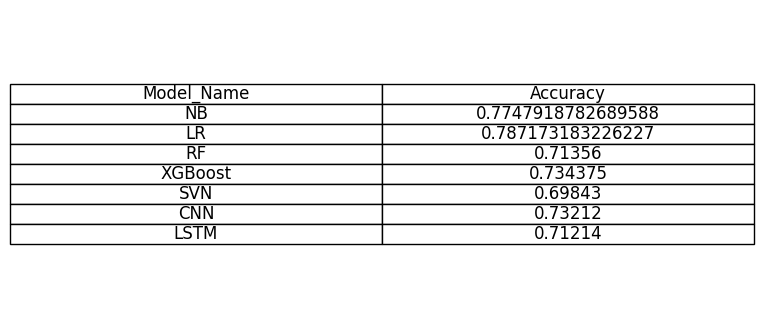

In [27]:

# Example dictionary with data
data = model_score
# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(data.items()), columns=['Model_Name', 'Accuracy'])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the size as needed

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Render the table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Adjust table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Save the table as an image
plt.savefig('model_accuracy_table.png', bbox_inches='tight', pad_inches=0.1)

# Show the plot (optional)
plt.show()





In [29]:
df.to_csv('../figures/model_scores.csv')